In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

%matplotlib inline
import cv2

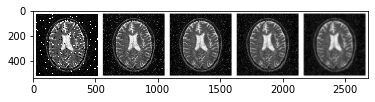

In [7]:
#가우스 블러 사용
img = cv2.imread('./data/brain.jpeg')
gauss_7 = cv2.GaussianBlur(img,(7,7),0) #7x7 블러 시켜라 , 더많은 부분을 보고 평균화 시키겠다.
gauss_11 = cv2.GaussianBlur(img,(11,11),0)
gauss_15 = cv2.GaussianBlur(img,(15,15),0)
gauss_25 = cv2.GaussianBlur(img,(25,25),0)


plt.imshow(np.hstack([img, gauss_7, gauss_11, gauss_15, gauss_25    ])   ) 
#노이즈들이 많이 사라짐, 블러링 된다고 말함, gauss_25는 어느정도 블러가 되었지만 잡음이 많단ㄴ것을 알수있따

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


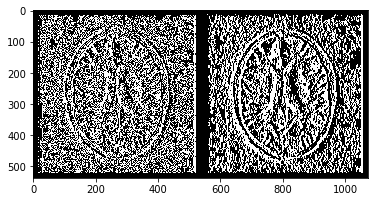

In [9]:
#소벨 필터 사용
sobel1 = cv2.Sobel(img, cv2.CV_64F, 1 , 0, ksize=3)   #ksize 는 커널 사이즈, 64플롯 타입으로 출력(음수도 표시하기 위함)
sobel2 = cv2.Sobel(gauss_7, cv2.CV_64F, 1 , 0, ksize=3)   #


plt.imshow(np.hstack([sobel1, sobel2])) # 노이즈가 너무 많아서 다 걸려버림...0에서 1로 정규화 안되어 있기도 하고

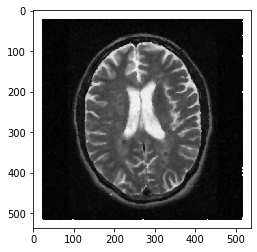

In [11]:
#median 필터, 값들의 중간값
median = cv2.medianBlur(img, 5)

plt.imshow(median) #엄청 깨끗하게 나온다

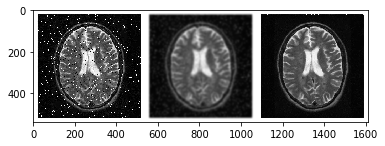

In [14]:
plt.imshow(np.hstack([img, gauss_25 ,median])) 
#원본은 잡음이 너무 많다.
#가우시안은 블러가 좀 심하다
# median 은 평균화, 고주파 성분이 남아잇다.?